In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("dataFiltrada.csv", low_memory = False)
data = data.loc[data['price'] < 15000000,:].drop('Unnamed: 0', axis = 1)
data['rango'] = data['price'].apply(lambda x: int(x/5000) + 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45997 entries, 0 to 46002
Data columns (total 22 columns):
index                      45997 non-null int64
created_on                 45997 non-null object
operation                  45997 non-null object
property_type              45997 non-null object
state_name                 45997 non-null object
place_name                 45997 non-null object
lat                        45997 non-null float64
lon                        45997 non-null float64
price                      45997 non-null float64
surface_total_in_m2        45997 non-null float64
price_usd_per_m2           45997 non-null float64
cant_prop                  45997 non-null float64
media_por_barrio           45997 non-null float64
mediana_por_barrio         45997 non-null float64
geoPos                     45997 non-null object
distancia_al_centro        45997 non-null float64
distanciaAIndoamericano    45997 non-null float64
distanciaAFuerteApache     45997 non-null float64

In [136]:

data2 = data.loc[:, ['property_type', 'place_name', 'price_usd_per_m2','surface_total_in_m2','distancia_al_centro', 'cant_subtes_cercanos', 'cant_trenes_cercanos','rango']]
data2.head()


,property_type,place_name,price_usd_per_m2,surface_total_in_m2,distancia_al_centro,cant_subtes_cercanos,cant_trenes_cercanos,rango
0,house,Pilar,319.444444,720.0,50845.960557,0,0,47
1,house,Pilar,1375.000000,160.0,47404.183107,0,0,45
2,house,Pilar,1166.666667,180.0,42683.661730,0,0,43
3,house,Pilar,1247.357294,473.0,57150.478593,0,0,119
4,house,Pilar,226.315789,760.0,52134.639818,0,0,35


In [139]:
dataGroup = data2.groupby('rango', as_index=False)['distancia_al_centro'].agg({'cantidad':'count'})
dataGroup = dataGroup.loc[dataGroup['cantidad'] > 5 ,:]
dataFinal = pd.merge(data2, dataGroup, on= 'rango')


In [154]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44978 entries, 0 to 44977
Data columns (total 9 columns):
property_type           44978 non-null object
place_name              44978 non-null object
price_usd_per_m2        44978 non-null float64
surface_total_in_m2     44978 non-null float64
distancia_al_centro     44978 non-null float64
cant_subtes_cercanos    44978 non-null int64
cant_trenes_cercanos    44978 non-null int64
rango                   44978 non-null int64
cantidad                44978 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [150]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

x = np.array(dataFinal.iloc[:, 3:7])
y = np.array(dataFinal['rango'])
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, random_state = 7)

In [151]:
#utilizo k-fold cross validation para determinar el mejor k 

vecinos = list(filter(lambda x: x%2 != 0, list(range(1,50))))
cv_scores = []

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number 

The optimal number of neighbors is 1


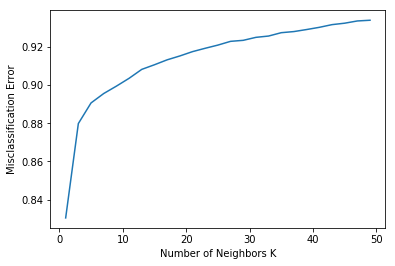

In [152]:
MSE = [1 - x for x in cv_scores]


optimal_k = vecinos[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)


plt.plot(vecinos, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [153]:


knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train, y_train)

pred = knn.predict(x_test)
predicc = []
print(accuracy_score(y_test, pred))
for i in range(len(y_test)):
    predicc.append((y_test[i], pred[i]))

predicc


0.177856825256


[(30, 23),
 (71, 24),
 (49, 50),
 (20, 21),
 (49, 81),
 (79, 79),
 (29, 18),
 (22, 37),
 (317, 323),
 (361, 361),
 (67, 48),
 (130, 57),
 (11, 16),
 (57, 57),
 (46, 28),
 (36, 53),
 (20, 24),
 (18, 20),
 (71, 13),
 (37, 24),
 (47, 125),
 (31, 51),
 (25, 37),
 (32, 53),
 (38, 38),
 (59, 125),
 (15, 33),
 (20, 20),
 (45, 139),
 (25, 22),
 (83, 28),
 (50, 119),
 (39, 35),
 (20, 20),
 (12, 8),
 (151, 240),
 (54, 69),
 (161, 128),
 (76, 76),
 (71, 63),
 (139, 59),
 (33, 44),
 (36, 35),
 (16, 22),
 (57, 251),
 (26, 33),
 (28, 27),
 (100, 100),
 (19, 19),
 (19, 26),
 (72, 72),
 (14, 13),
 (18, 13),
 (39, 49),
 (45, 47),
 (53, 31),
 (17, 17),
 (28, 85),
 (11, 14),
 (27, 56),
 (91, 91),
 (241, 100),
 (29, 26),
 (24, 27),
 (24, 29),
 (39, 44),
 (21, 37),
 (27, 22),
 (11, 17),
 (67, 16),
 (26, 22),
 (59, 37),
 (36, 42),
 (16, 20),
 (83, 28),
 (11, 22),
 (31, 30),
 (24, 17),
 (13, 14),
 (57, 61),
 (38, 58),
 (127, 125),
 (14, 15),
 (30, 30),
 (131, 145),
 (18, 16),
 (105, 91),
 (16, 23),
 (34, 34)